## Kaggle Submission File

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Load Data

In [ ]:
metadata_train = pd.read_csv("train.csv")
metadata_train.head


<bound method NDFrame.head of               lab_id    video_id mouse1_strain mouse1_color mouse1_sex  \
0     AdaptableSnail    44566106    CD-1 (ICR)        white       male   
1     AdaptableSnail   143861384    CD-1 (ICR)        white       male   
2     AdaptableSnail   209576908    CD-1 (ICR)        white       male   
3     AdaptableSnail   278643799    CD-1 (ICR)        white       male   
4     AdaptableSnail   351967631    CD-1 (ICR)        white       male   
...              ...         ...           ...          ...        ...   
8784    UppityFerret  1610683375      C57Bl/6N        black       male   
8785    UppityFerret  1725214092      C57Bl/6N        black       male   
8786    UppityFerret  1960237444      C57Bl/6N        black       male   
8787    UppityFerret  2045808129      C57Bl/6N        black       male   
8788    UppityFerret  2104375029      C57Bl/6N        black       male   

      mouse1_id  mouse1_age mouse1_condition mouse2_strain mouse2_color  ...  \
0

array([[<Axes: title={'center': 'video_id'}>,
        <Axes: title={'center': 'mouse1_id'}>,
        <Axes: title={'center': 'mouse2_id'}>],
       [<Axes: title={'center': 'mouse3_id'}>,
        <Axes: title={'center': 'mouse4_id'}>,
        <Axes: title={'center': 'frames_per_second'}>],
       [<Axes: title={'center': 'video_duration_sec'}>,
        <Axes: title={'center': 'pix_per_cm_approx'}>,
        <Axes: title={'center': 'video_width_pix'}>],
       [<Axes: title={'center': 'video_height_pix'}>,
        <Axes: title={'center': 'arena_width_cm'}>,
        <Axes: title={'center': 'arena_height_cm'}>]], dtype=object)

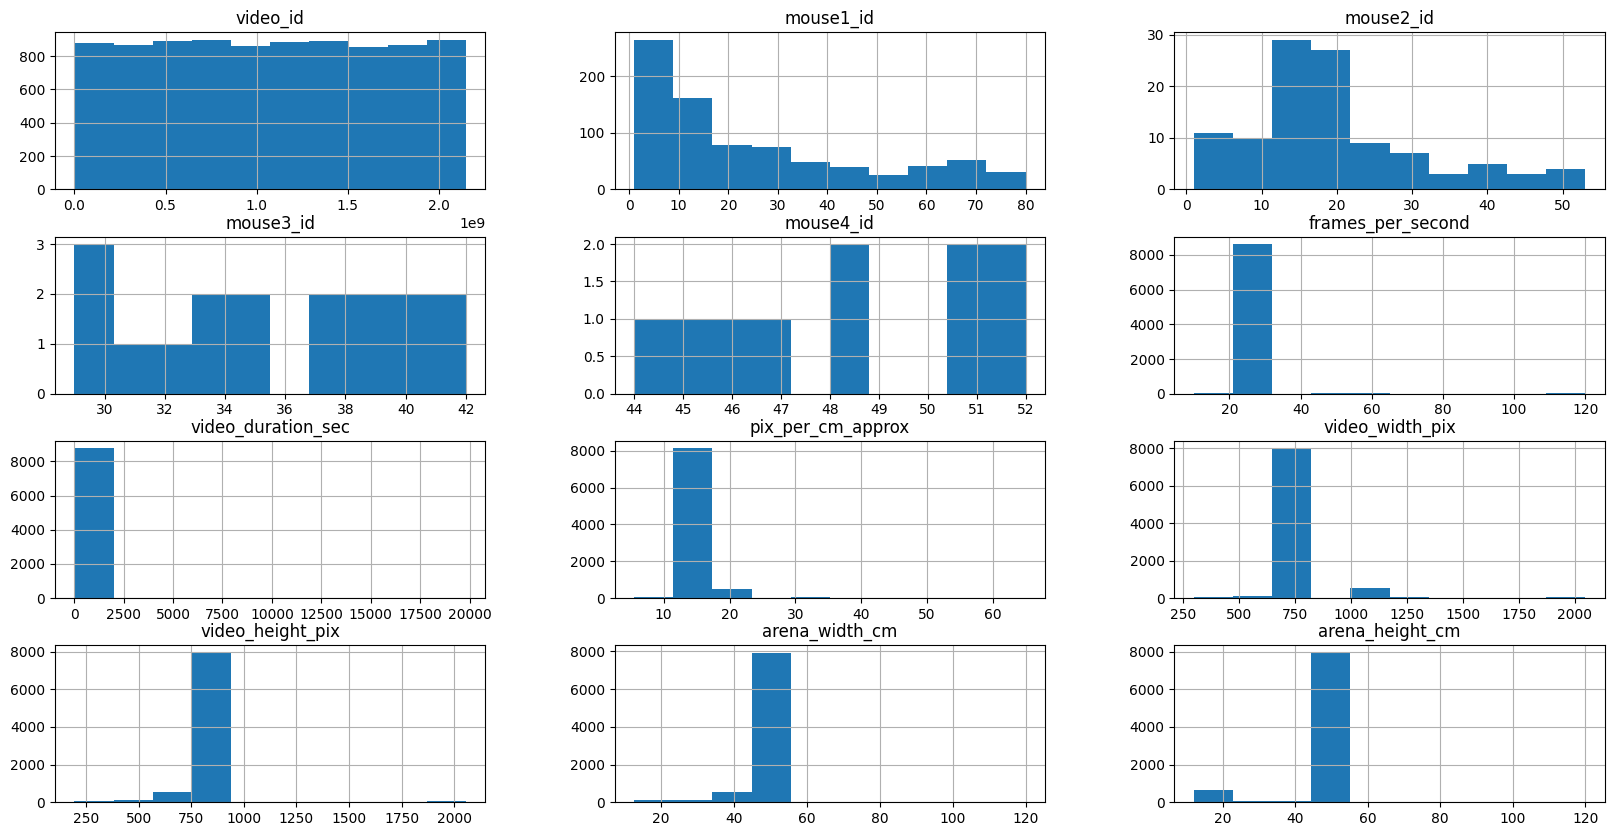

In [17]:

metadata_train.hist(figsize=(20, 10))

In [10]:
def get_all_tracking_paths(metadata_df, tracking_root_dir):
    
    all_paths = []
    
    for index, row in metadata_df.iterrows():
        lab_id = row['lab_id']
        video_id = row['video_id']

        file_path = f"{tracking_root_dir}/{lab_id}/{video_id}.parquet"
        
        # Check if the file exists
        if os.path.exists(file_path): 
            all_paths.append({
                'lab_id': lab_id,
                'video_id': video_id,
                'file_path': file_path
            })
        
    return pd.DataFrame(all_paths)

train_paths = get_all_tracking_paths(metadata_train, 'train_tracking')
train_paths_df = pd.DataFrame(train_paths)

train_paths_df.head()

,lab_id,video_id,file_path
0,AdaptableSnail,44566106,train_tracking/AdaptableSnail/44566106.parquet
1,AdaptableSnail,143861384,train_tracking/AdaptableSnail/143861384.parquet
2,AdaptableSnail,209576908,train_tracking/AdaptableSnail/209576908.parquet
3,AdaptableSnail,278643799,train_tracking/AdaptableSnail/278643799.parquet
4,AdaptableSnail,351967631,train_tracking/AdaptableSnail/351967631.parquet
